In [1]:
import pandas as pd

In [2]:
import os

In [48]:
import numpy as np

In [6]:
# 指定文件夹路径
folder_path = "D:\\gaotongliang\\0"

In [7]:
# 获取文件夹中所有的 CSV 文件名
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

In [8]:
# 初始化一个空的 DataFrame 用于存储合并结果
combined_df = pd.DataFrame()

In [9]:
# 遍历所有 CSV 文件并读取内容
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

In [10]:
# 输出合并后的 DataFrame
print(combined_df)

     Mutation    Count
0        A19A  2819896
1        A19C       47
2        A19D      217
3        A19E      277
4        A19F      864
...       ...      ...
9473    Y372T      139
9474    Y372V        1
9475    Y372W       14
9476    Y372X        8
9477    Y372Y  1496956

[9478 rows x 2 columns]


In [11]:
combined_df.to_csv('combined_df_0.csv', index=False)  

In [15]:
combined_df.to_csv("D:\\gaotongliang\\0\\combined_df_0.csv", index=False)  

In [17]:
folder_path = "D:\\gaotongliang\\2"
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
combined_df = pd.DataFrame()
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    combined_df = pd.concat([combined_df, df], ignore_index=True)
combined_df.to_csv("D:\\gaotongliang\\2\\combined_df_2.csv", index=False)  

In [18]:
folder_path = "D:\\gaotongliang\\3"
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
combined_df = pd.DataFrame()
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    combined_df = pd.concat([combined_df, df], ignore_index=True)
combined_df.to_csv("D:\\gaotongliang\\3\\combined_df_3.csv", index=False)  

In [3]:
cf_0 = pd.read_csv('D:\\gaotongliang\\0\\combined_df_0.csv')

In [8]:
cf_0.sample


<bound method NDFrame.sample of      Mutation    Count  Position
0        A19A  2819896        19
1        A19C       47        19
2        A19D      217        19
3        A19E      277        19
4        A19F      864        19
...       ...      ...       ...
9473    Y372T      139       372
9474    Y372V        1       372
9475    Y372W       14       372
9476    Y372X        8       372
9477    Y372Y  1496956       372

[9478 rows x 3 columns]>

In [5]:
cf_2 = pd.read_csv('D:\\gaotongliang\\2\\combined_df_2.csv')

In [6]:
cf_3 = pd.read_csv('D:\\gaotongliang\\3\\combined_df_3.csv')

## 提取位点位置

In [7]:
cf_0['Position'] = cf_0['Mutation'].str.extract(r'(\d+)').astype(int)

In [9]:
cf_2['Position'] = cf_2['Mutation'].str.extract(r'(\d+)').astype(int)

In [10]:
cf_3['Position'] = cf_3['Mutation'].str.extract(r'(\d+)').astype(int)

In [11]:
cf_0.head(5)

,Mutation,Count,Position
0,A19A,2819896,19
1,A19C,47,19
2,A19D,217,19
3,A19E,277,19
4,A19F,864,19


## 提取突变氨基酸

In [12]:
cf_0['Mutant AA'] =cf_0['Mutation'].str[-1]

In [13]:
cf_2['Mutant AA'] =cf_2['Mutation'].str[-1]

In [14]:
cf_3['Mutant AA'] =cf_3['Mutation'].str[-1]

In [15]:
cf_0.head(5)

,Mutation,Count,Position,Mutant AA
0,A19A,2819896,19,A
1,A19C,47,19,C
2,A19D,217,19,D
3,A19E,277,19,E
4,A19F,864,19,F


## 提取野生型氨基酸

In [20]:
cf_0['WT AA'] =cf_0['Mutation'].str[0]

In [21]:
cf_2['WT AA'] =cf_2['Mutation'].str[0]

In [22]:
cf_3['WT AA'] =cf_3['Mutation'].str[0]

In [23]:
cf_0.head(5)

,Mutation,Count,Position,Mutant AA,WT AA
0,A19A,2819896,19,A,A
1,A19C,47,19,C,A
2,A19D,217,19,D,A
3,A19E,277,19,E,A
4,A19F,864,19,F,A


## 计算各个位点的总Count

In [24]:
cf_0['Total Count'] = cf_0.groupby('Position')['Count'].transform('sum')

In [25]:
cf_2['Total Count'] = cf_2.groupby('Position')['Count'].transform('sum')

In [26]:
cf_3['Total Count'] = cf_3.groupby('Position')['Count'].transform('sum')

In [27]:
cf_0.head(5)

,Mutation,Count,Position,Mutant AA,WT AA,Total Count
0,A19A,2819896,19,A,A,2828717
1,A19C,47,19,C,A,2828717
2,A19D,217,19,D,A,2828717
3,A19E,277,19,E,A,2828717
4,A19F,864,19,F,A,2828717


## 计算各个位点的Count占比

In [28]:
cf_0['Count_percent'] = cf_0['Count']/cf_0['Total Count']

In [29]:
cf_2['Count_percent'] = cf_2['Count']/cf_2['Total Count']

In [54]:
cf_3['Count_percent'] = cf_3['Count']/cf_3['Total Count']

In [30]:
cf_0.head(5)

,Mutation,Count,Position,Mutant AA,WT AA,Total Count,Count_percent
0,A19A,2819896,19,A,A,2828717,0.996882
1,A19C,47,19,C,A,2828717,0.000017
2,A19D,217,19,D,A,2828717,0.000077
3,A19E,277,19,E,A,2828717,0.000098
4,A19F,864,19,F,A,2828717,0.000305


## 合并表格

### 将表格按照时间点合并

#### 将0h和2h表格合并，以2h表格内元素为基准，并新增 $ log_2 Enrichment $ 列。

In [35]:
cf_2_vs_cf_0 = pd.merge(cf_2, cf_0, on = ['Mutation', 'Position', 'Mutant AA', 'WT AA'])

In [36]:
cf_2_vs_cf_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10336 entries, 0 to 10335
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mutation         10336 non-null  object 
 1   Count_x          10336 non-null  int64  
 2   Position         10336 non-null  int32  
 3   Mutant AA        10336 non-null  object 
 4   WT AA            10336 non-null  object 
 5   Total Count_x    10336 non-null  int64  
 6   Count_percent_x  10336 non-null  float64
 7   Count_y          10336 non-null  int64  
 8   Total Count_y    10336 non-null  int64  
 9   Count_percent_y  10336 non-null  float64
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 767.2+ KB


聚合后的表格共有10336条数据，但是部分列名重复，且需要将列名中的'_x''_y'修改为对应的时间点。

In [41]:
cf_2_vs_cf_0 = cf_2_vs_cf_0[["Mutation", "Position", "Mutant AA", "WT AA", "Count_x", "Total Count_x", "Count_percent_x", "Count_y", "Total Count_y", "Count_percent_y"]]

In [42]:
cf_2_vs_cf_0.rename(columns=lambda x: x.replace("_x", "_2h").replace("_y", "_0h"), inplace=True)

In [43]:
cf_2_vs_cf_0.head(5)

,Mutation,Position,Mutant AA,WT AA,Count_2h,Total Count_2h,Count_percent_2h,Count_0h,Total Count_0h,Count_percent_0h
0,A19A,19,A,A,1393749,1397156,0.997561,2819896,2828717,0.996882
1,A19D,19,D,A,69,1397156,0.000049,217,2828717,0.000077
2,A19E,19,E,A,102,1397156,0.000073,277,2828717,0.000098
3,A19F,19,F,A,735,1397156,0.000526,864,2828717,0.000305
4,A19G,19,G,A,127,1397156,0.000091,330,2828717,0.000117


##### log2_Enrichment = log2_Enrichment(Count_percent_2h/Count_percent_0h)

In [49]:
cf_2_vs_cf_0['Log_2 Enrichment'] = np.log2(cf_2_vs_cf_0['Count_percent_2h']/cf_2_vs_cf_0['Count_percent_0h'])

In [50]:
cf_2_vs_cf_0.head(5)

,Mutation,Position,Mutant AA,WT AA,Count_2h,Total Count_2h,Count_percent_2h,Count_0h,Total Count_0h,Count_percent_0h,Log_2 Enrichment
0,A19A,19,A,A,1393749,1397156,0.997561,2819896,2828717,0.996882,0.000984
1,A19D,19,D,A,69,1397156,0.000049,217,2828717,0.000077,-0.635372
2,A19E,19,E,A,102,1397156,0.000073,277,2828717,0.000098,-0.423662
3,A19F,19,F,A,735,1397156,0.000526,864,2828717,0.000305,0.784368
4,A19G,19,G,A,127,1397156,0.000091,330,2828717,0.000117,-0.359983


#### 将0h和3h表格合并，以2h表格内元素为基准，并新增 $ log_2 Enrichment $ 列。

In [55]:
cf_3_vs_cf_0 = pd.merge(cf_3, cf_0, on = ['Mutation', 'Position', 'Mutant AA', 'WT AA'])
cf_3_vs_cf_0 = cf_3_vs_cf_0[["Mutation", "Position", "Mutant AA", "WT AA", "Count_x", "Total Count_x", "Count_percent_x", "Count_y", "Total Count_y", "Count_percent_y"]]
cf_3_vs_cf_0.rename(columns=lambda x: x.replace("_x", "_3h").replace("_y", "_0h"), inplace=True)
cf_3_vs_cf_0['Log_2 Enrichment'] = np.log2(cf_3_vs_cf_0['Count_percent_3h']/cf_2_vs_cf_0['Count_percent_0h'])
cf_3_vs_cf_0.head(5)

,Mutation,Position,Mutant AA,WT AA,Count_3h,Total Count_3h,Count_percent_3h,Count_0h,Total Count_0h,Count_percent_0h,Log_2 Enrichment
0,A19A,19,A,A,828480,830057,0.998100,2819896,2828717,0.996882,0.001762
1,A19D,19,D,A,22,830057,0.000027,217,2828717,0.000077,-1.533254
2,A19E,19,E,A,50,830057,0.000060,277,2828717,0.000098,-0.701020
3,A19F,19,F,A,117,830057,0.000141,864,2828717,0.000305,-1.115657
4,A19G,19,G,A,114,830057,0.000137,330,2828717,0.000117,0.235433


#### 将2h和3h表格合并，以2h表格内元素为基准，并新增 $ log_2 Enrichment $ 列。

In [56]:
cf_3_vs_cf_2 = pd.merge(cf_3, cf_2, on = ['Mutation', 'Position', 'Mutant AA', 'WT AA'])
cf_3_vs_cf_2 = cf_3_vs_cf_2[["Mutation", "Position", "Mutant AA", "WT AA", "Count_x", "Total Count_x", "Count_percent_x", "Count_y", "Total Count_y", "Count_percent_y"]]
cf_3_vs_cf_2.rename(columns=lambda x: x.replace("_x", "_3h").replace("_y", "_2h"), inplace=True)
cf_3_vs_cf_2['Log_2 Enrichment'] = np.log2(cf_3_vs_cf_0['Count_percent_3h']/cf_2_vs_cf_0['Count_percent_2h'])
cf_3_vs_cf_2.head(5)

,Mutation,Position,Mutant AA,WT AA,Count_3h,Total Count_3h,Count_percent_3h,Count_2h,Total Count_2h,Count_percent_2h,Log_2 Enrichment
0,A19A,19,A,A,828480,830057,0.998100,1393749,1397156,0.997561,0.000779
1,A19D,19,D,A,22,830057,0.000027,69,1397156,0.000049,-0.897882
2,A19E,19,E,A,50,830057,0.000060,102,1397156,0.000073,-0.277358
3,A19F,19,F,A,117,830057,0.000141,735,1397156,0.000526,-1.900025
4,A19G,19,G,A,114,830057,0.000137,127,1397156,0.000091,0.595416


In [101]:
cf_2_vs_cf_0.to_csv("D:\\gaotongliang\\cf_2_vs_cf_0.csv")
cf_3_vs_cf_0.to_csv("D:\\gaotongliang\\cf_3_vs_cf_0.csv")
cf_3_vs_cf_2.to_csv("D:\\gaotongliang\\cf_3_vs_cf_2.csv")

## 根据`cf_2_vs_cf_0 `，`cf_3_vs_cf_0` 和 `cf_3_vs_cf_2`的数据生成热图。

### 横轴为Position, 纵轴为20种氨基酸（Mutant AA），映射的值为Log_2 Enrichment

In [57]:
import seaborn as sns

In [58]:
import matplotlib.pyplot as plt

In [67]:
sns.set_palette('pastel')

In [76]:
# 定义所有可能的氨基酸
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

In [77]:
# 构建一个空的 DataFrame，用于存储热图数据
heatmap_data_2 = pd.DataFrame(index=amino_acids, columns=cf_2_vs_cf_0['Position'].unique())

In [84]:
# 填充热图数据
for _, row in cf_2_vs_cf_0.iterrows():
    position = row['Position']
    mutant_aa = row['Mutant AA']
    wt_aa = row['WT AA']
    log2_enrichment = row['Log_2 Enrichment']

    # 如果 Mutant AA 等于 WT AA，则设置为 NaN（空白）
    if mutant_aa == wt_aa:
        heatmap_data_2.at[mutant_aa, position] = np.nan
    else:
        heatmap_data_2.at[mutant_aa, position] = log2_enrichment
# 将列名转换为整数类型以便排序
heatmap_data_2.columns = heatmap_data_2.columns.astype(int)
heatmap_data_2 = heatmap_data_2[sorted(heatmap_data_2.columns)]
# 确保所有值是浮点数
heatmap_data_2 = heatmap_data_2.apply(pd.to_numeric, errors='coerce')

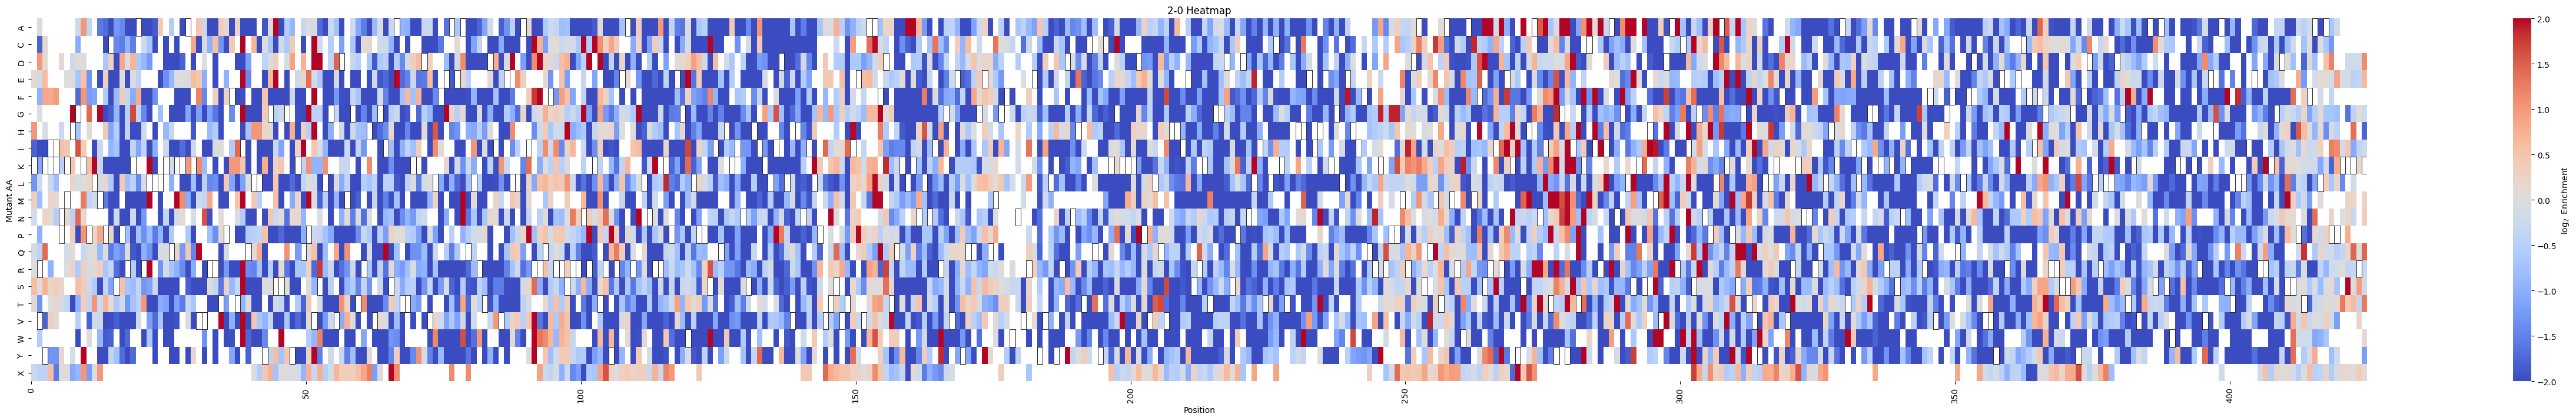

In [93]:
# 绘制热图
plt.figure(figsize=(64, 8))
sns.heatmap(
    heatmap_data_2,
    cmap="coolwarm",  # 使用 coolwarm 色盘
    annot=False,     # 显示数值
    fmt=".2f",      # 数值格式化为两位小数
    cbar_kws={"label": r"$\log_2$ Enrichment"},  # 使用 LaTeX 设置 Log₂ 下标
    mask=heatmap_data_2.isnull(),  # 掩码掉 NaN 值（即野生型位点）
    vmin=-2,          # 设置颜色映射的最小值
    vmax=2            # 设置颜色映射的最大值
)
# 设置横坐标以 50 为单位距离
positions = heatmap_data_2.columns
plt.xticks(ticks=np.arange(len(positions))[::50], labels=positions[::50])

# 高亮 WT AA（白色背景，黑边框）
for _, row in cf_2_vs_cf_0.iterrows():
    position = row['Position']
    wt_aa = row['WT AA']
    
    # 获取 WT AA 在热图中的位置
    x = np.where(heatmap_data_2.columns == position)[0][0]  # 横坐标索引
    y = np.where(heatmap_data_2.index == wt_aa)[0][0]      # 纵坐标索引
    
    # 添加白色背景和黑边框
    plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, edgecolor='black', facecolor='white', lw=0.5))
# 设置标题和坐标轴标签
plt.title("2-0 Heatmap")
plt.xlabel("Position")
plt.ylabel("Mutant AA")

# 显示图形
plt.show()

In [94]:
# 构建一个空的 DataFrame，用于存储热图数据
heatmap_data_3 = pd.DataFrame(index=amino_acids, columns=cf_3_vs_cf_0['Position'].unique())

In [95]:
# 填充热图数据
for _, row in cf_3_vs_cf_0.iterrows():
    position = row['Position']
    mutant_aa = row['Mutant AA']
    wt_aa = row['WT AA']
    log2_enrichment = row['Log_2 Enrichment']

    # 如果 Mutant AA 等于 WT AA，则设置为 NaN（空白）
    if mutant_aa == wt_aa:
        heatmap_data_3.at[mutant_aa, position] = np.nan
    else:
        heatmap_data_3.at[mutant_aa, position] = log2_enrichment
# 将列名转换为整数类型以便排序
heatmap_data_3.columns = heatmap_data_3.columns.astype(int)
heatmap_data_3 = heatmap_data_3[sorted(heatmap_data_3.columns)]
# 确保所有值是浮点数
heatmap_data_3 = heatmap_data_3.apply(pd.to_numeric, errors='coerce')

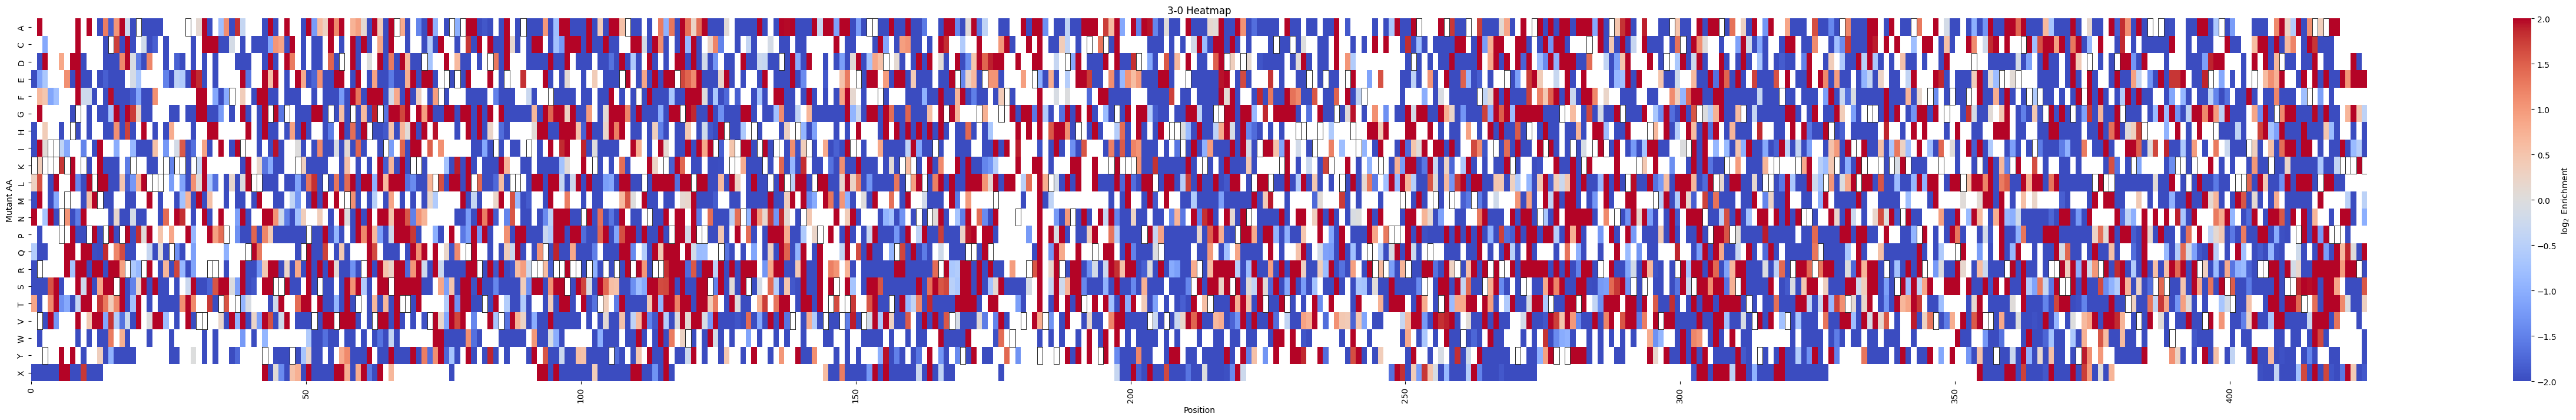

In [96]:
# 绘制热图
plt.figure(figsize=(64, 8))
sns.heatmap(
    heatmap_data_3,
    cmap="coolwarm",  # 使用 coolwarm 色盘
    annot=False,     # 显示数值
    fmt=".2f",      # 数值格式化为两位小数
    cbar_kws={"label": r"$\log_2$ Enrichment"},  # 使用 LaTeX 设置 Log₂ 下标
    mask=heatmap_data_2.isnull(),  # 掩码掉 NaN 值（即野生型位点）
    vmin=-2,          # 设置颜色映射的最小值
    vmax=2            # 设置颜色映射的最大值
)
# 设置横坐标以 50 为单位距离
positions = heatmap_data_3.columns
plt.xticks(ticks=np.arange(len(positions))[::50], labels=positions[::50])

# 高亮 WT AA（白色背景，黑边框）
for _, row in cf_3_vs_cf_0.iterrows():
    position = row['Position']
    wt_aa = row['WT AA']
    
    # 获取 WT AA 在热图中的位置
    x = np.where(heatmap_data_3.columns == position)[0][0]  # 横坐标索引
    y = np.where(heatmap_data_3.index == wt_aa)[0][0]      # 纵坐标索引
    
    # 添加白色背景和黑边框
    plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, edgecolor='black', facecolor='white', lw=0.5))
# 设置标题和坐标轴标签
plt.title("3-0 Heatmap")
plt.xlabel("Position")
plt.ylabel("Mutant AA")

# 显示图形
plt.show()

In [97]:
# 构建一个空的 DataFrame，用于存储热图数据
heatmap_data_3_2 = pd.DataFrame(index=amino_acids, columns=cf_3_vs_cf_2['Position'].unique())

In [98]:
# 填充热图数据
for _, row in cf_3_vs_cf_2.iterrows():
    position = row['Position']
    mutant_aa = row['Mutant AA']
    wt_aa = row['WT AA']
    log2_enrichment = row['Log_2 Enrichment']

    # 如果 Mutant AA 等于 WT AA，则设置为 NaN（空白）
    if mutant_aa == wt_aa:
        heatmap_data_3_2.at[mutant_aa, position] = np.nan
    else:
        heatmap_data_3_2.at[mutant_aa, position] = log2_enrichment
# 将列名转换为整数类型以便排序
heatmap_data_3_2.columns = heatmap_data_3_2.columns.astype(int)
heatmap_data_3_2 = heatmap_data_3_2[sorted(heatmap_data_3.columns)]
# 确保所有值是浮点数
heatmap_data_3_2 = heatmap_data_3_2.apply(pd.to_numeric, errors='coerce')

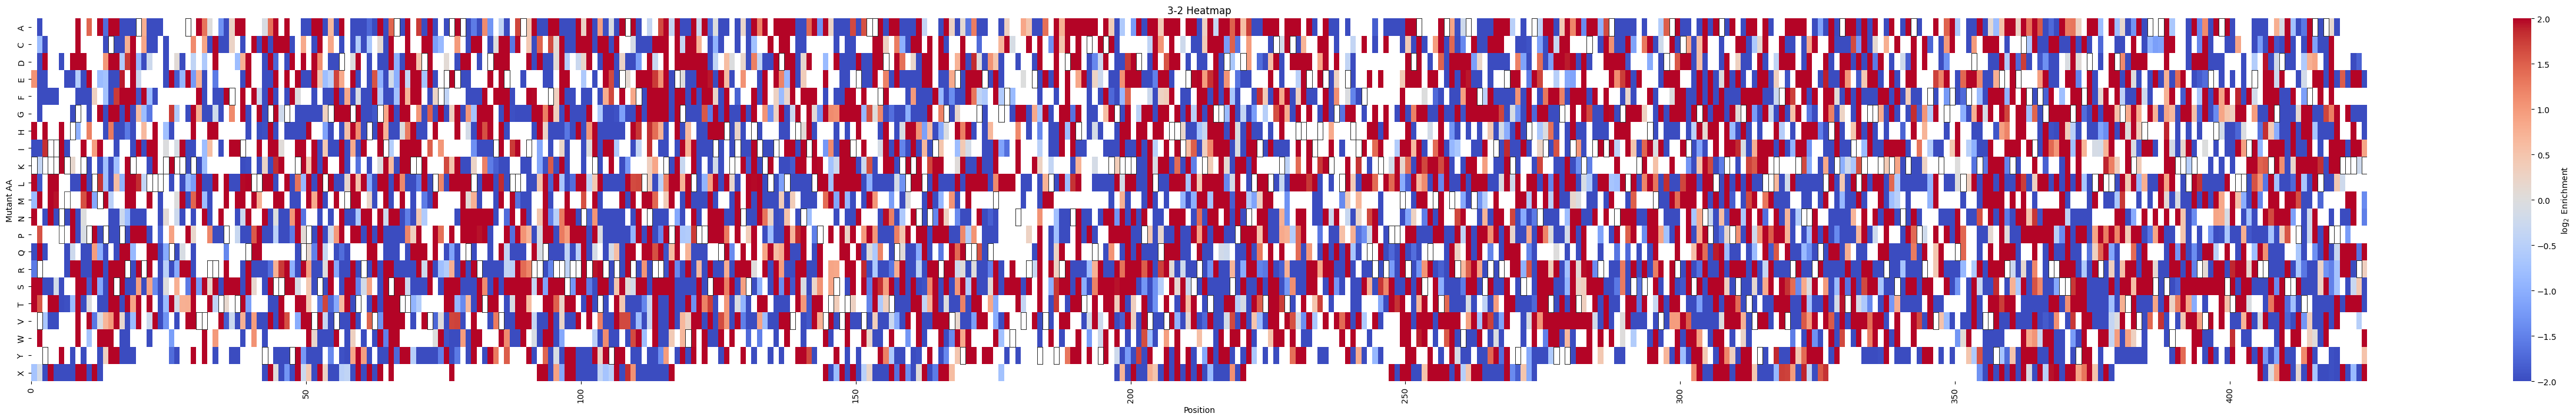

In [99]:
# 绘制热图
plt.figure(figsize=(64, 8))
sns.heatmap(
    heatmap_data_3_2,
    cmap="coolwarm",  # 使用 coolwarm 色盘
    annot=False,     # 显示数值
    fmt=".2f",      # 数值格式化为两位小数
    cbar_kws={"label": r"$\log_2$ Enrichment"},  # 使用 LaTeX 设置 Log₂ 下标
    mask=heatmap_data_2.isnull(),  # 掩码掉 NaN 值（即野生型位点）
    vmin=-2,          # 设置颜色映射的最小值
    vmax=2            # 设置颜色映射的最大值
)
# 设置横坐标以 50 为单位距离
positions = heatmap_data_3_2.columns
plt.xticks(ticks=np.arange(len(positions))[::50], labels=positions[::50])

# 高亮 WT AA（白色背景，黑边框）
for _, row in cf_3_vs_cf_2.iterrows():
    position = row['Position']
    wt_aa = row['WT AA']
    
    # 获取 WT AA 在热图中的位置
    x = np.where(heatmap_data_3_2.columns == position)[0][0]  # 横坐标索引
    y = np.where(heatmap_data_3_2.index == wt_aa)[0][0]      # 纵坐标索引
    
    # 添加白色背景和黑边框
    plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, edgecolor='black', facecolor='white', lw=0.5))
# 设置标题和坐标轴标签
plt.title("3-2 Heatmap")
plt.xlabel("Position")
plt.ylabel("Mutant AA")

# 显示图形
plt.show()